In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import os

In [2]:
base_dir = 'cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [7]:
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['acc'])

In [8]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_steps=50,
                              verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 [==============================] - 10s 101ms/step - loss: 0.8777 - acc: 0.5120 - val_loss: 0.6891 - val_acc: 0.5170
Epoch 2/100
100/100 [==============================] - 10s 97ms/step - loss: 0.7115 - acc: 0.5635 - val_loss: 0.6297 - val_acc: 0.6430
Epoch 3/100
100/100 [==============================] - 10s 97ms/step - loss: 0.6854 - acc: 0.6065 - val_loss: 0.6303 - val_acc: 0.6650
Epoch 4/100
100/100 [==============================] - 10s 97ms/step - loss: 0.6568 - acc: 0.6265 - val_loss: 0.6239 - val_acc: 0.6070
Epoch 5/100
100/100 [==============================] - 10s 97ms/step - loss: 0.6420 - acc: 0.6340 - val_loss: 0.5917 - val_acc: 0.6750
Epoch 6/100
100/100 [==============================] - 10s 97ms/step - loss: 0.6269 - acc: 0.6530 - val_loss: 0.5568 - val_acc: 0.7090
Epoch 7/100
100/100 [==============================] - 10s 97ms/step - loss: 0.6223 - acc: 0.661

Epoch 60/100
100/100 [==============================] - 10s 97ms/step - loss: 0.4982 - acc: 0.7745 - val_loss: 0.4819 - val_acc: 0.7700
Epoch 61/100
100/100 [==============================] - 10s 96ms/step - loss: 0.4873 - acc: 0.7760 - val_loss: 0.4975 - val_acc: 0.7670
Epoch 62/100
100/100 [==============================] - 10s 97ms/step - loss: 0.5003 - acc: 0.7750 - val_loss: 0.4501 - val_acc: 0.7990
Epoch 63/100
100/100 [==============================] - 10s 97ms/step - loss: 0.4751 - acc: 0.7790 - val_loss: 0.5025 - val_acc: 0.7860
Epoch 64/100
100/100 [==============================] - 10s 97ms/step - loss: 0.5015 - acc: 0.7615 - val_loss: 0.4720 - val_acc: 0.7710
Epoch 65/100
100/100 [==============================] - 10s 97ms/step - loss: 0.4831 - acc: 0.7705 - val_loss: 0.4666 - val_acc: 0.7900
Epoch 66/100
100/100 [==============================] - 10s 96ms/step - loss: 0.4870 - acc: 0.7685 - val_loss: 0.6164 - val_acc: 0.7490
Epoch 67/100
100/100 [==========================

Text(0.5, 1.0, 'Training and validation loss')

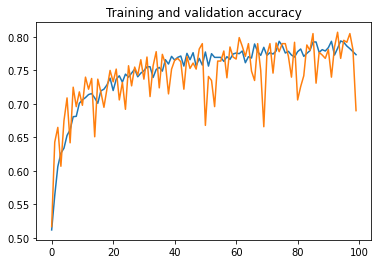

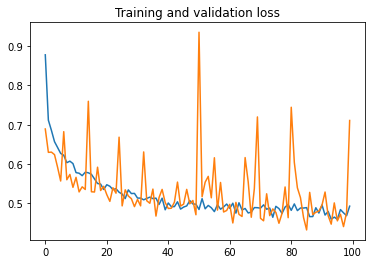

In [9]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [10]:
from tensorflow.keras.preprocessing import image
import numpy as np

test = os.path.join(base_dir, 'test')
for dirpath, dirs, files in os.walk(test):
    files.sort()
    for filename in files:
        test_path = os.path.join(dirpath, filename)
        img = image.load_img(test_path, target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)

        images = np.vstack([x])
        classes = model.predict(images, batch_size=10)
        if classes[0]>0:
            print(filename + " is a dog")
        else:
            print(filename + " is a cat")        


0.jpg is a cat
1.jpg is a dog
2.jpg is a dog
3.jpg is a cat
4.jpg is a dog
5.jpg is a dog
6.jpg is a dog
7.jpg is a dog
8.jpg is a dog
9.jpg is a dog


In [11]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-11-26 16:42:11--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:400a:808::2010, 2404:6800:400a:80c::2010, 2404:6800:400a:80b::2010, ...
접속 storage.googleapis.com (storage.googleapis.com)|2404:6800:400a:808::2010|:443... 접속됨.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  6.17MB/s    in 11s     

2020-11-26 16:42:23 (7.68 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

